In [134]:
import pandas as pd
import numpy as np

In [135]:
import sklearn

In [136]:
df_org=pd.read_csv('train.csv')

In [137]:
df_test=pd.read_csv('test.csv')

In [138]:
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [139]:
df=df_org.copy()

In [140]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [141]:
from sklearn.impute import SimpleImputer

In [142]:
imp={}

In [143]:
SI=SimpleImputer(add_indicator=True)

In [144]:
cols=['Age']

In [145]:
for col in cols:
    co=[]
    SI.fit(df[[col]])
    data=SI.transform(df[[col]])
    #print(data)
    co.append(f'{col}')
    co.append(f'{col}_ind')
    df1=pd.DataFrame(data,columns=co)
    #print(df1)
    df.drop(col,axis=1,inplace=True)
    df=pd.concat([df,df1],axis=1)

In [146]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Age_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.000000,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.000000,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.000000,0.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.000000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.000000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,29.699118,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.000000,0.0


In [147]:
#SI.fit(df[["Age"]])

In [148]:
#df1=SI.transform(df[['Age']])

In [149]:
#df1_1=pd.DataFrame(df1,columns=['Age','Age_ind'])

In [150]:
#df.drop('Age',axis=1,inplace=True)

In [151]:
#pd.concat([df,df1_1],axis=1)

In [152]:
#SI.indicator_

In [153]:
from sklearn.impute import SimpleImputer
def numeric_imputaion(df,col_num,col_cat,dict_values=None):
    
    dict_value={}
    co=[]
    
    if dict_values == None :
        print("inside")
        if col_num == None:
            cols=list(df.columns)
        for col in col_num:
            co.clear()
            SI=SimpleImputer()
            
            print("inside for")
            SI.fit(df[[col]])
            data=SI.transform(df[[col]])
            print("below transform")
            dict_value[col]=SI.statistics_[0]
            print("below dict")
            co.append(f'{col}')
            #co.append(f'{col}_ind')
            print('below co append')
            print(data)
            df1=pd.DataFrame(data,columns=co)
            print('df1')
            #df.drop(col,axis=1,inplace=True)
            #df.reset_index(drop=True, inplace=True)
            #df1.reset_index(drop=True, inplace=True)
            df.drop(col,axis=1,inplace=True)
            df=pd.concat([df,df1],axis=1)
            #data=np.delete(data)
            
        for col in col_cat:
            co=[]
            SI=SimpleImputer(strategy='most_frequent')
            SI.fit(df[[col]])
            data=SI.transform(df[[col]])
            dict_value[col]=SI.statistics_[0]
            co.append(f'{col}')
            #co.append(f'{col}_ind')
            df1=pd.DataFrame(data,columns=co)
            df.drop(col,axis=1,inplace=True)
            df=pd.concat([df,df1],axis=1)
                                 
    else:
        print("inside else")
        df.fillna(dict_values,axis=1,inplace=True)
            
            
    return (df,dict_value)
        
    

In [154]:
cols=['Age','Fare']
cols_cat=['Cabin','Embarked']

In [155]:
#import pdb

In [156]:
#pdb.run()

In [157]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Age_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.000000,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.000000,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.000000,0.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.000000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.000000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,29.699118,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.000000,0.0


In [158]:
df=df_org.copy()

In [159]:
df,dl=numeric_imputaion(df,cols,cols_cat)

inside
inside for
below transform
below dict
below co append
[[22.        ]
 [38.        ]
 [26.        ]
 [35.        ]
 [35.        ]
 [29.69911765]
 [54.        ]
 [ 2.        ]
 [27.        ]
 [14.        ]
 [ 4.        ]
 [58.        ]
 [20.        ]
 [39.        ]
 [14.        ]
 [55.        ]
 [ 2.        ]
 [29.69911765]
 [31.        ]
 [29.69911765]
 [35.        ]
 [34.        ]
 [15.        ]
 [28.        ]
 [ 8.        ]
 [38.        ]
 [29.69911765]
 [19.        ]
 [29.69911765]
 [29.69911765]
 [40.        ]
 [29.69911765]
 [29.69911765]
 [66.        ]
 [28.        ]
 [42.        ]
 [29.69911765]
 [21.        ]
 [18.        ]
 [14.        ]
 [40.        ]
 [27.        ]
 [29.69911765]
 [ 3.        ]
 [19.        ]
 [29.69911765]
 [29.69911765]
 [29.69911765]
 [29.69911765]
 [18.        ]
 [ 7.        ]
 [21.        ]
 [49.        ]
 [29.        ]
 [65.        ]
 [29.69911765]
 [21.        ]
 [28.5       ]
 [ 5.        ]
 [11.        ]
 [22.        ]
 [38.        ]
 [45.    

[[  7.25  ]
 [ 71.2833]
 [  7.925 ]
 [ 53.1   ]
 [  8.05  ]
 [  8.4583]
 [ 51.8625]
 [ 21.075 ]
 [ 11.1333]
 [ 30.0708]
 [ 16.7   ]
 [ 26.55  ]
 [  8.05  ]
 [ 31.275 ]
 [  7.8542]
 [ 16.    ]
 [ 29.125 ]
 [ 13.    ]
 [ 18.    ]
 [  7.225 ]
 [ 26.    ]
 [ 13.    ]
 [  8.0292]
 [ 35.5   ]
 [ 21.075 ]
 [ 31.3875]
 [  7.225 ]
 [263.    ]
 [  7.8792]
 [  7.8958]
 [ 27.7208]
 [146.5208]
 [  7.75  ]
 [ 10.5   ]
 [ 82.1708]
 [ 52.    ]
 [  7.2292]
 [  8.05  ]
 [ 18.    ]
 [ 11.2417]
 [  9.475 ]
 [ 21.    ]
 [  7.8958]
 [ 41.5792]
 [  7.8792]
 [  8.05  ]
 [ 15.5   ]
 [  7.75  ]
 [ 21.6792]
 [ 17.8   ]
 [ 39.6875]
 [  7.8   ]
 [ 76.7292]
 [ 26.    ]
 [ 61.9792]
 [ 35.5   ]
 [ 10.5   ]
 [  7.2292]
 [ 27.75  ]
 [ 46.9   ]
 [  7.2292]
 [ 80.    ]
 [ 83.475 ]
 [ 27.9   ]
 [ 27.7208]
 [ 15.2458]
 [ 10.5   ]
 [  8.1583]
 [  7.925 ]
 [  8.6625]
 [ 10.5   ]
 [ 46.9   ]
 [ 73.5   ]
 [ 14.4542]
 [ 56.4958]
 [  7.65  ]
 [  7.8958]
 [  8.05  ]
 [ 29.    ]
 [ 12.475 ]
 [  9.    ]
 [  9.5   ]
 [  7.7875]
 [ 4

In [160]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Age,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,22.000000,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,38.000000,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,26.000000,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,35.000000,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,35.000000,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,27.000000,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,19.000000,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,29.699118,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,26.000000,30.0000,C148,C


In [161]:
dl

{'Age': 29.69911764705882,
 'Fare': 32.204207968574636,
 'Cabin': 'B96 B98',
 'Embarked': 'S'}

In [162]:
#df_t,d=numeric_imputaion(df_test,cols,dl)

In [163]:
#imp['Age']=df['Age'].mean()

In [164]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Age            0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [165]:
df_test.fillna(dl,inplace=True)

In [166]:
pd.get_dummies(df,columns=['Embarked','Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,Cabin_B50,Cabin_B51 B53 B55,Cabin_B57 B59 B63 B66,Cabin_B58 B60,Cabin_B69,Cabin_B71,Cabin_B73,Cabin_B77,Cabin_B78,Cabin_B79,Cabin_B80,Cabin_B82 B84,Cabin_B86,Cabin_B94,...,Cabin_C93,Cabin_C95,Cabin_C99,Cabin_D,Cabin_D10 D12,Cabin_D11,Cabin_D15,Cabin_D17,Cabin_D19,Cabin_D20,Cabin_D21,Cabin_D26,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,22.000000,7.2500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,38.000000,71.2833,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,26.000000,7.9250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,35.000000,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,35.000000,8.0500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,27.000000,13.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,19.000000,30.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,29.699118,23.4500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [167]:
ordinal_dictionary={'male':1,'female':0}

In [168]:
### get dummy or one hot encoding
from sklearn.preprocessing import OrdinalEncoder

In [169]:
gender=['female','male']

In [170]:
OE=OrdinalEncoder(categories=[gender])

In [171]:
OE.fit(df[['Sex']])

OrdinalEncoder(categories=[['female', 'male']], dtype=<class 'numpy.float64'>)

In [172]:
df['Sex']=OE.transform(df[['Sex']])

In [173]:
#df.drop('Sex1',inplace=True,axis=1)

In [174]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Age,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,1,0,A/5 21171,22.000000,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,1,0,PC 17599,38.000000,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,0,0,STON/O2. 3101282,26.000000,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,1,0,113803,35.000000,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,0,0,373450,35.000000,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,0,0,211536,27.000000,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,0,0,112053,19.000000,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,1,2,W./C. 6607,29.699118,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",1.0,0,0,111369,26.000000,30.0000,C148,C


In [175]:
#def dummy(df,cols):

In [176]:
#def encoding(df,label_enc_col,label_values,one_hot_col):
'''one hot encoder , label encoder and ordinal encoder care clubbed together'''

'one hot encoder , label encoder and ordinal encoder care clubbed together'

In [177]:
drop_columns=['PassengerId','Name','Ticket','Cabin','Survived']

In [178]:
from sklearn.preprocessing import OneHotEncoder

In [179]:
ohe=OneHotEncoder(sparse=False)

In [180]:
ohe.fit(df[['Embarked']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [181]:
dd=ohe.transform(df[['Embarked']])

In [182]:
ohe.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [183]:
df


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Age,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,1,0,A/5 21171,22.000000,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,1,0,PC 17599,38.000000,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,0,0,STON/O2. 3101282,26.000000,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,1,0,113803,35.000000,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,0,0,373450,35.000000,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,0,0,211536,27.000000,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,0,0,112053,19.000000,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,1,2,W./C. 6607,29.699118,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",1.0,0,0,111369,26.000000,30.0000,C148,C


In [184]:
df=pd.get_dummies(df,columns=['Embarked'])

In [185]:
drop_columns=['PassengerId','Name','Ticket','Cabin','Survived']

In [186]:
y=df['Survived']

In [187]:
X=df.drop(columns=drop_columns,axis=1)

In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [189]:
ss=StandardScaler()

In [190]:
ss.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [191]:
X_cols=list(X.columns)

In [192]:
X=ss.transform(X)

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [194]:
y_test.shape

(179,)

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
rfc=RandomForestClassifier()

In [197]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [198]:
y_predict=rfc.predict(X_test)

In [199]:
y_prob_predict=rfc.predict_proba(X_train)

In [200]:
y_prob_predict

array([[1.    , 0.    ],
       [0.    , 1.    ],
       [0.03  , 0.97  ],
       ...,
       [0.79  , 0.21  ],
       [0.96  , 0.04  ],
       [0.9975, 0.0025]])

In [201]:
rfc.feature_importances_

array([0.07361541, 0.29370773, 0.04974015, 0.03805476, 0.25817546,
       0.25115004, 0.01353605, 0.00634246, 0.01567794])

In [202]:
feature_importance=dict(zip(X_cols,rfc.feature_importances_))

In [203]:
#feature_importance['imp']
feature_importance

{'Pclass': 0.07361540990410603,
 'Sex': 0.29370773069664774,
 'SibSp': 0.04974015097111236,
 'Parch': 0.03805475708529259,
 'Age': 0.25817546468052044,
 'Fare': 0.2511500367852345,
 'Embarked_C': 0.013536050699473962,
 'Embarked_Q': 0.006342459970212826,
 'Embarked_S': 0.01567793920739962}

In [204]:
feature_importance=pd.DataFrame.from_dict({'feature':X_cols,'imp':rfc.feature_importances_})

In [205]:
feature_importance.sort_values('imp')

,feature,imp
7,Embarked_Q,0.006342
6,Embarked_C,0.013536
8,Embarked_S,0.015678
3,Parch,0.038055
2,SibSp,0.049740
0,Pclass,0.073615
5,Fare,0.251150
4,Age,0.258175
1,Sex,0.293708


In [206]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import SGDClassifier

In [207]:
sgdc=SGDClassifier()

In [208]:
cross_val_score(rfc,X_train,y_train,cv=5,scoring='roc_auc')

array([0.90010331, 0.88553719, 0.86875653, 0.87199582, 0.83970742])

In [209]:
y_prob=cross_val_predict(rfc,X_train,y_train,cv=5,method='predict_proba')

In [210]:
y_prob

array([[0.99857143, 0.00142857],
       [0.02      , 0.98      ],
       [0.04      , 0.96      ],
       ...,
       [0.27      , 0.73      ],
       [0.93      , 0.07      ],
       [0.99714286, 0.00285714]])

In [211]:
#precision,recall,threshold=precision_recall_curve(y_train,y_prob_predict[0])

In [212]:
yscore=cross_val_predict(sgdc,X_train,y_train,cv=3,method='decision_function')

In [213]:
#yscore

In [214]:
precisions, recalls, thresholds = precision_recall_curve(y_train, yscore)

In [215]:
yprob_t=y_prob[:,1]

In [216]:
yprob=yprob_t.reshape(-1,1)

In [217]:
p1,r1,t1=precision_recall_curve(y_train,yprob)

In [218]:
#t1

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline

In [220]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc = 'best')

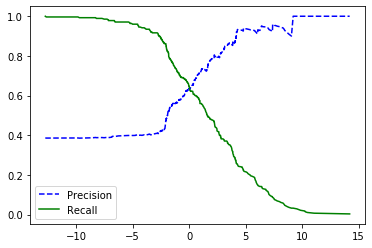

In [221]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

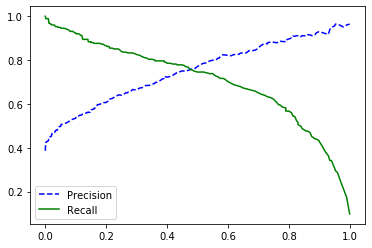

In [222]:
plot_precision_recall_vs_threshold(p1, r1, t1)
plt.show()

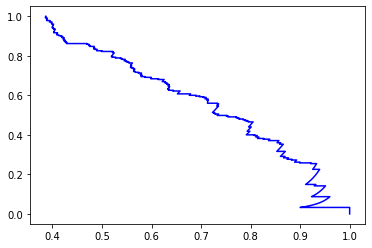

In [223]:
plt.plot(precisions,recalls,"b",label="xaxis")

In [224]:
type(precisions)

numpy.ndarray

In [225]:
thresholds[ np.argmax(precisions>=.90)]

4.161648408106955

In [226]:
from sklearn.metrics import roc_curve

In [227]:
fpr,tpr,threshold_roc=roc_curve(y_train,yscore)

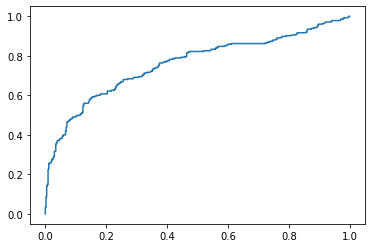

In [228]:
plt.plot(fpr,tpr)

In [229]:
from sklearn.metrics import roc_auc_score

In [230]:
roc_auc_score(y_train,yscore)

0.7589556896193052

In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [232]:
scores=cross_val_score(rfc,X_train,y_train,cv=5)

In [233]:
scores

array([0.84615385, 0.83216783, 0.8028169 , 0.83098592, 0.77464789])

In [234]:
param_grid={'n_estimator':[200,400,600,800,1000]}

In [235]:
lr_binary=LogisticRegression(penalty='l2',C=1.0,solver='liblinear',max_iter=100,multi_class='auto')

In [236]:
lr_param={'C':[.1,.3,.5,.7,.9,1,2,4,6,8,10]}
lr_grid=GridSearchCV(estimator=lr_binary,param_grid=lr_param,cv=5)

In [237]:
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 4, 6, 8, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [238]:
lr_grid.cv_results_

{'mean_fit_time': array([0.05376062, 0.00239329, 0.00299172, 0.00299187, 0.00279179,
        0.00258579, 0.00438557, 0.00378299, 0.00400352, 0.00678921,
        0.00339904]),
 'std_fit_time': array([0.09706932, 0.00048877, 0.0006306 , 0.0006303 , 0.00039823,
        0.0008031 , 0.00195263, 0.00211545, 0.00089953, 0.0026887 ,
        0.0013505 ]),
 'mean_score_time': array([0.00119514, 0.00079808, 0.0007978 , 0.00059824, 0.00019927,
        0.00100565, 0.00099139, 0.00100455, 0.00120311, 0.00099721,
        0.00039868]),
 'std_score_time': array([3.97706243e-04, 3.99042070e-04, 7.46174501e-04, 4.88460995e-04,
        3.98540497e-04, 1.53308894e-05, 6.21073752e-04, 1.43895834e-05,
        3.96378281e-04, 2.21134228e-05, 4.88285637e-04]),
 'param_C': masked_array(data=[0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 4, 6, 8, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),
 'params

In [239]:
from keras import models
from keras import layers

In [240]:
network=models.Sequential()

In [241]:
X.shape

(891, 9)

In [242]:
network.add(layers.Dense(512,activation='relu',input_shape=(9,)))
network.add(layers.Dense(1,activation='sigmoid'))

In [243]:
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [248]:
network.fit(X_train,y_train,epochs=5)

Epoch 1/5
712/712 [==============================] - 0s 43us/step - loss: 0.3980 - accuracy: 0.8301
Epoch 2/5
712/712 [==============================] - 0s 39us/step - loss: 0.3949 - accuracy: 0.8301
Epoch 3/5
712/712 [==============================] - 0s 39us/step - loss: 0.3913 - accuracy: 0.8329
Epoch 4/5
712/712 [==============================] - 0s 45us/step - loss: 0.3880 - accuracy: 0.8371
Epoch 5/5
712/712 [==============================] - 0s 42us/step - loss: 0.3847 - accuracy: 0.8399


In [245]:
test_loss,test_acc=network.evaluate(X_test,y_test)

179/179 [==============================] - 0s 150us/step


In [246]:
test_loss

0.4872217136721371

In [247]:
test_acc

0.7765362858772278

In [249]:
from sklearn.neighbors import KNeighborsClassifier

In [250]:
knn_param={'n_neighbours':[5,10,15],'weights':['uniform','distance']}
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski',p=2)

In [251]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [253]:
y_predict=knn.predict(X_test)